In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd


from hcnn.model import HarmonicFeatureExtractor, HarmonicFeatureExtractorConfig
from hcnn.utils import visualize_features, visualize_feature_embeddings
from data.kaggle_dataset.kaggle_raga_dataset import KaggleRagaDataset
from data.kaggle_dataset.kaggle_raga_dataloader import KaggleRagaDataloader

%load_ext autoreload
%autoreload 2

In [2]:
config = HarmonicFeatureExtractorConfig()
config.sample_rate = 44100
config.n_fft = 4096
config.hop_length = 2048
config.n_harmonics = 2
config.n_filters_per_semitone = 2
fe = HarmonicFeatureExtractor(config=config)

In [3]:
seq_len_s = 30
sample_rate = 44100
ds = KaggleRagaDataset('./data/kaggle_dataset/2', seq_len_s, sample_rate)

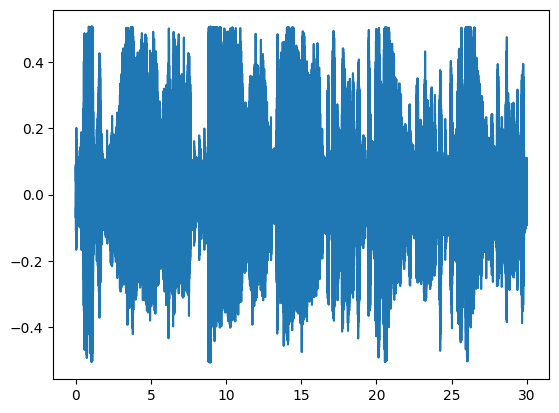

In [4]:
x, label = ds[12]
plt.plot(np.linspace(0, x.shape[1]/sample_rate, x.shape[1]), x.flatten())
ipd.Audio(x, rate=ds.sample_rate)

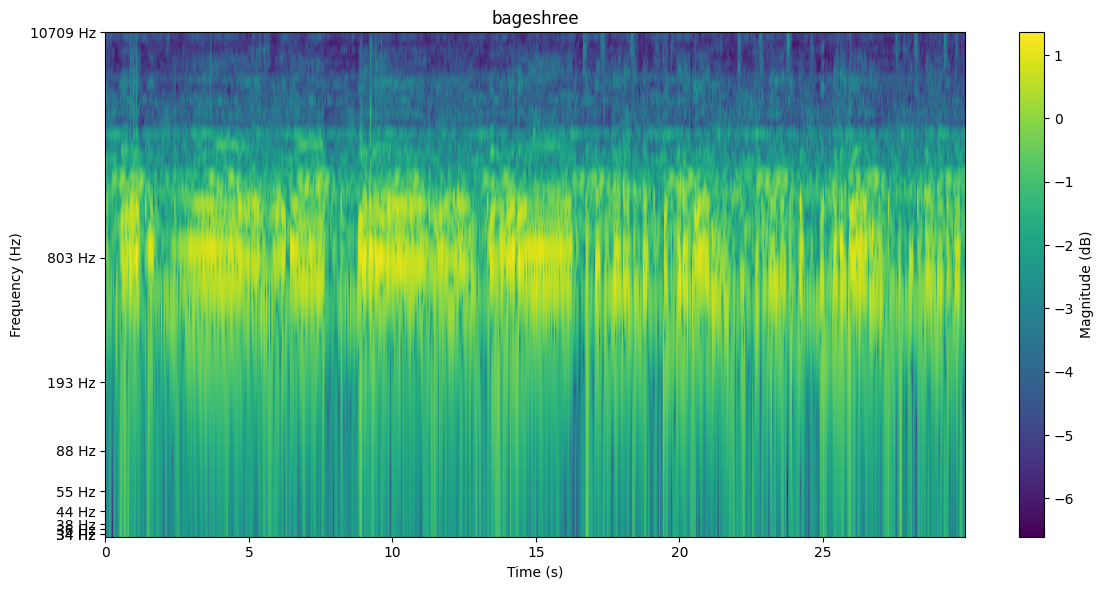

torch.Size([1, 200, 646])


In [5]:
features = fe(x).detach()
visualize_features(features, sample_rate=config.sample_rate, hop_length=config.hop_length, center_freqs=fe.center_freqs,
                   title=f'{ds.get_label_name(label)}', figsize=(12, 6))
print(features.shape)

(5248, 2)


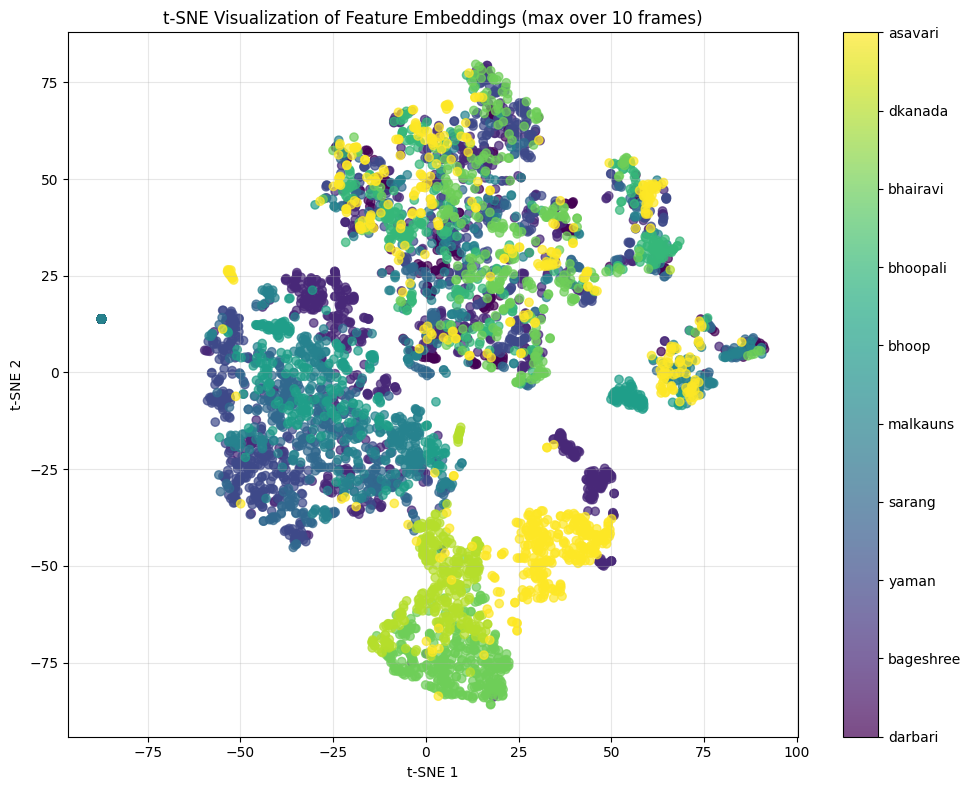

In [12]:
N_examples = len(ds)
F, L = [], []
for i in range(N_examples):
    x, label = ds[i]
    features = fe(x).detach()
    F.append(features)
    L.append(label)
F = torch.cat(F, dim=0)
L = torch.tensor(L)

visualize_feature_embeddings(F, L, ds.get_label_names(), method='tsne', n_components=2,
                             window_size=10, mode='max')

tensor(-inf)